## SEP to detect objects

Here I show the basic steps of using SEP to detect objects in an image. More information [here](https://sep.readthedocs.io/en/v1.0.x/tutorial.html).

In [1]:
import numpy as np
import sep

In [2]:
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

First, we’ll read an example image from a FITS file and display it, just to show what we’re dealing with. The example image is H$\alpha$ subtrated image.

In [3]:
# read image into standard 2-d numpy array
hdu = fits.open("difference_Ha.fits")
hdu[0].data

array([[ 603.58257584,  603.58257584,  548.51568131, ..., -321.70102609,
        -430.18229956, -444.86421562],
       [ 603.58257584,  603.58257584,  548.51568131, ..., -321.70102609,
        -430.18229956, -444.86421562],
       [ 603.58257584,  603.58257584,  548.51568131, ..., -321.70102609,
        -430.18229956, -444.86421562],
       ...,
       [-472.98667857, -418.94474742, -340.58586594, ...,  293.27226876,
         200.69717434,  294.53959472],
       [-145.90518997, -200.11100328, -253.77866873, ..., -291.24443468,
        -480.90703233, -125.60686143],
       [ 111.82156218,  -64.31215319, -393.00348001, ..., -321.22793166,
        -565.0979651 , -340.29232233]])

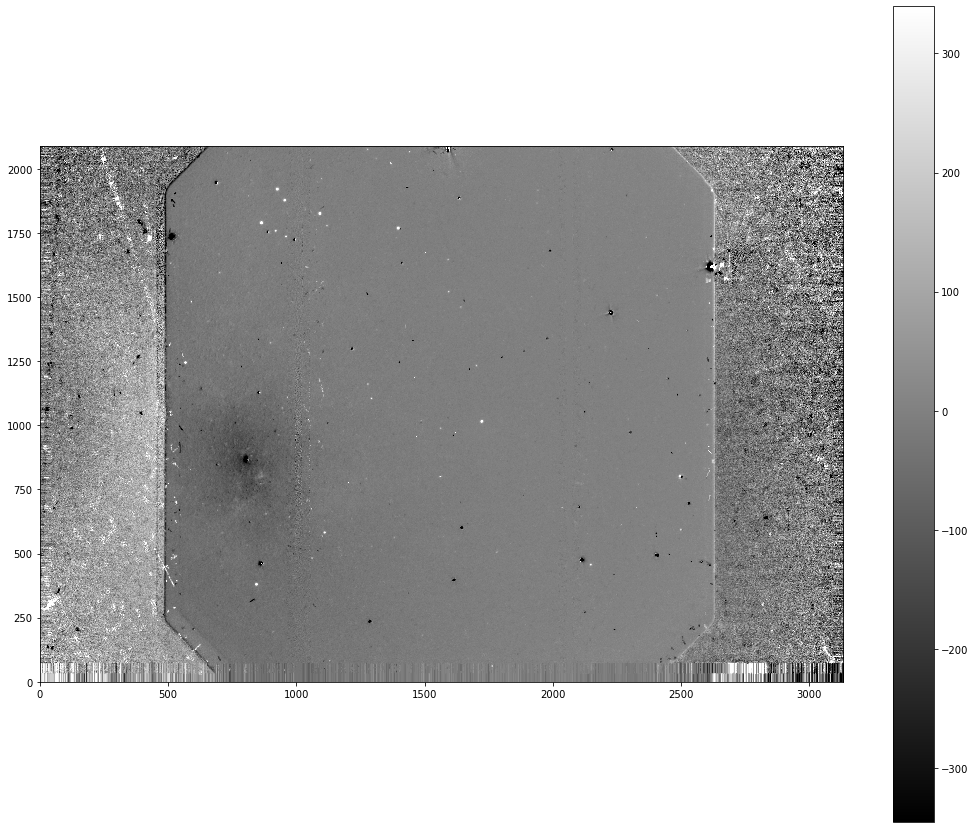

In [4]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
plt.imshow(hdu[0].data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("difference_Ha.jpg")

In [5]:
data = hdu[0].data[68:-50,559:-549]
len(data)

1970

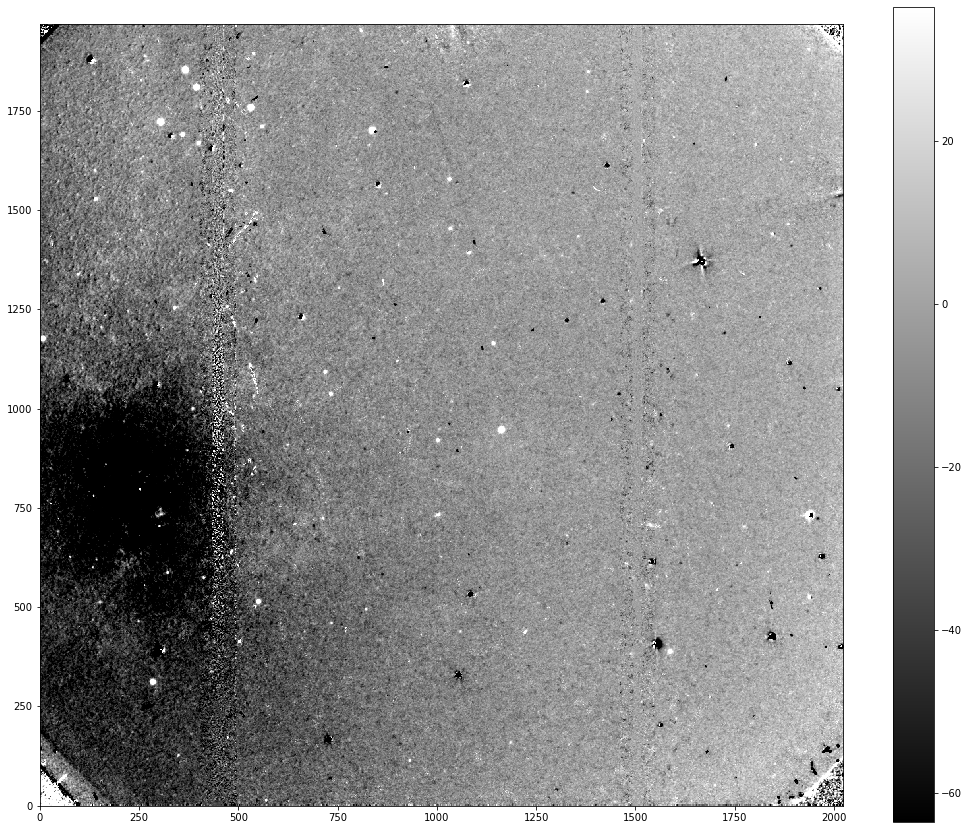

In [6]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

## Object detection

we can run object detection on the background-subtracted data. You can see the background noise level is pretty flat. So here we’re setting the detection threshold to be a constant value of 1.5σ where σ is the global background RMS.

In [7]:
# coverting in array
data = data.byteswap().newbyteorder()

In [8]:
try:
    objects = sep.extract(data, 30., err=None, mask=None, minarea=5, 
                                    filter_type='matched', deblend_nthresh=32, deblend_cont=0.005, clean=True, 
                                                          clean_param=1.0, segmentation_map=False)
except:
    print("Nathing to do")

sep.extract has many options for controlling detection threshold, pixel masking, filtering, and object deblending. See the reference documentation for details.

In [9]:
# how many objects were detected
len(objects)

382

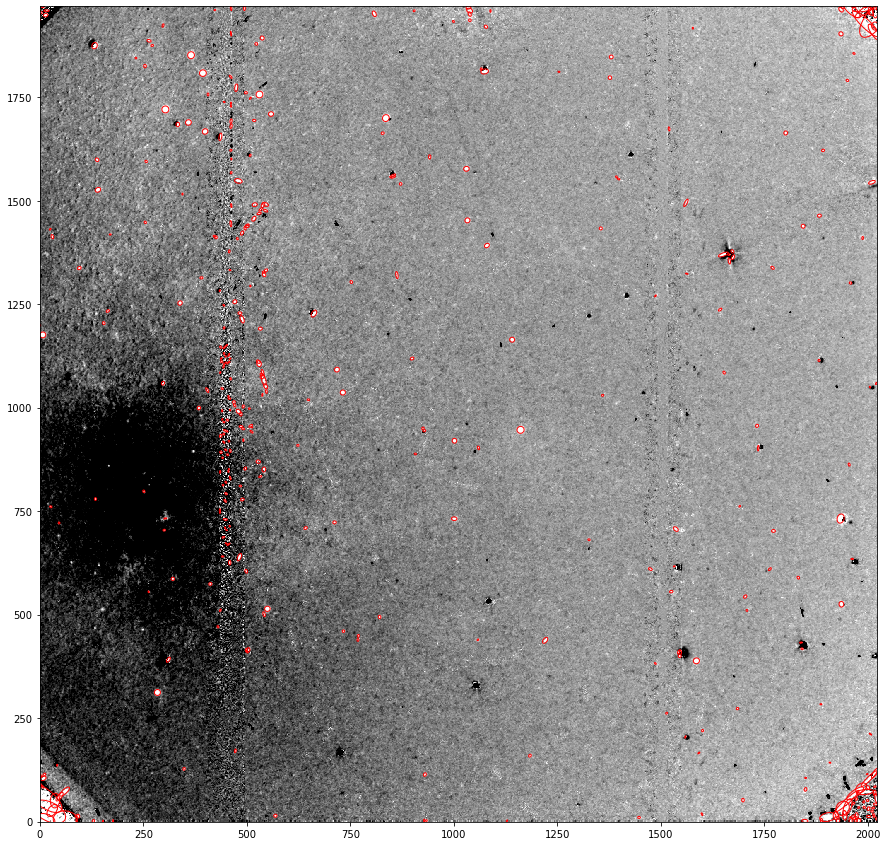

In [10]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("difference_Ha-sources.jpg")

In [11]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# Smart cutting

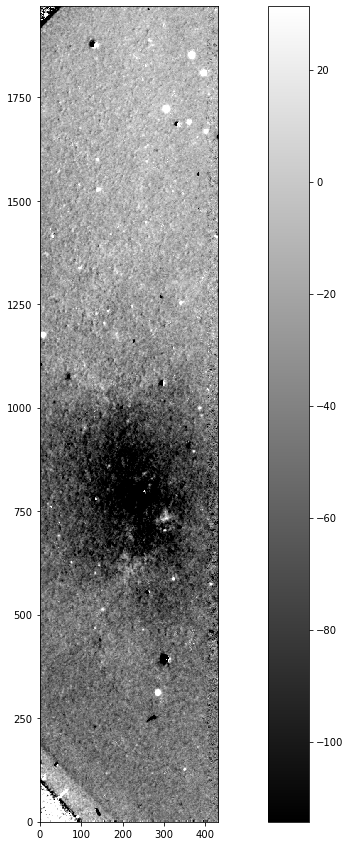

In [12]:
data_c1 = hdu[0].data[68:-50,559:990]#68:-50,559:-549
# show the image
m, s = np.mean(data_c1), np.std(data_c1)
plt.imshow(data_c1, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [13]:
data_c1 = data_c1.byteswap().newbyteorder()
try:
    objects_crop1 = sep.extract(data_c1, 30, err=None)
except:
    print("Nathing to do")

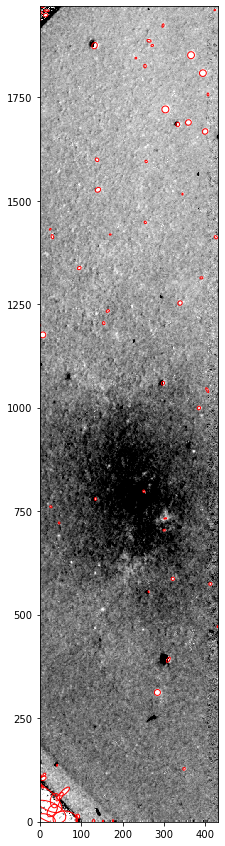

In [14]:
# plot background-subtracted image
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_c1), np.std(data_c1)
im = ax.imshow(data_c1, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects_crop1)):
    e = Ellipse(xy=(objects_crop1['x'][i], objects_crop1['y'][i]),
                width=6*objects_crop1['a'][i],
                height=6*objects_crop1['b'][i],
                angle=objects_crop1['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
#plt.savefig("difference_Ha-sources.jpg")

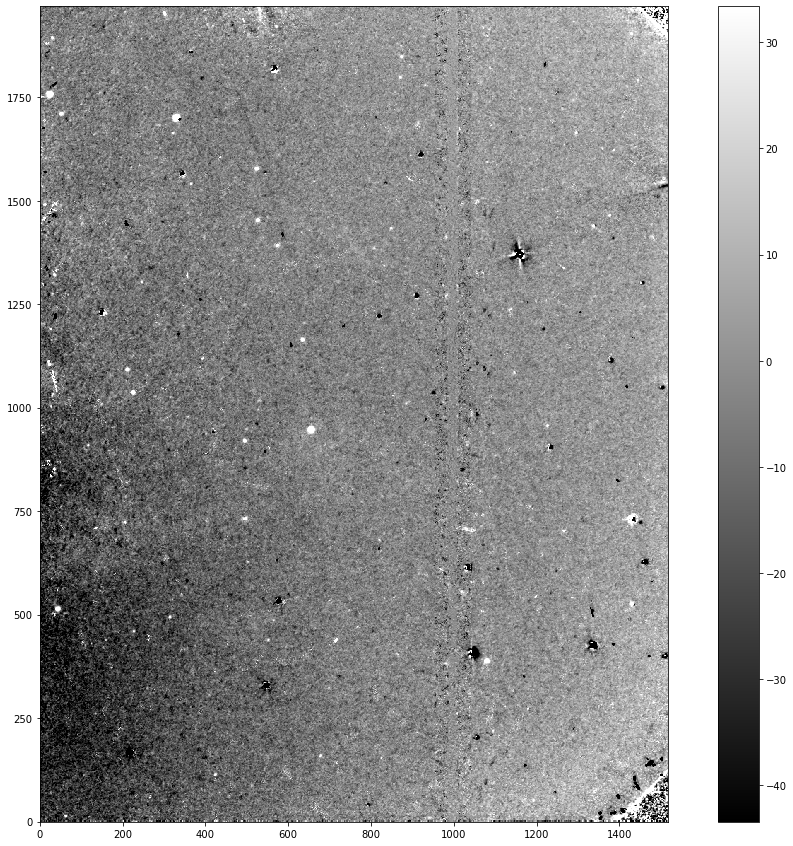

In [15]:
data_c2 = hdu[0].data[68:-50,1066:-549]#68:-50,559:-549
# show the image
m, s = np.mean(data_c2), np.std(data_c2)
plt.imshow(data_c2, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [16]:
data_c2 = data_c2.byteswap().newbyteorder()
try:
    objects_crop2 = sep.extract(data_c2, 30, err=None)
except:
    print("Nathing to do")

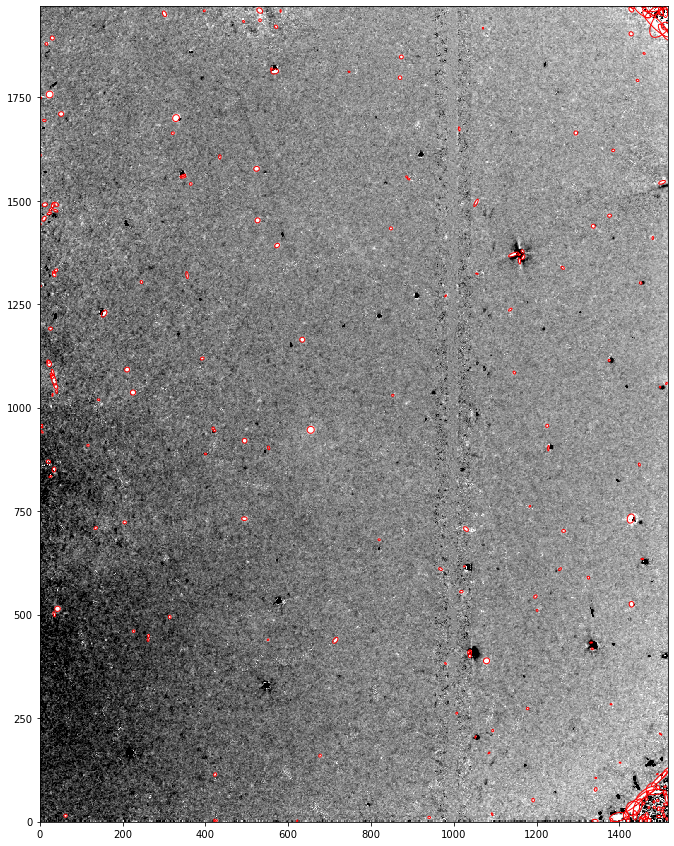

In [17]:
# plot background-subtracted image
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_c2), np.std(data_c2)
im = ax.imshow(data_c2, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects_crop2)):
    e = Ellipse(xy=(objects_crop2['x'][i], objects_crop2['y'][i]),
                width=6*objects_crop2['a'][i],
                height=6*objects_crop2['b'][i],
                angle=objects_crop2['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
#plt.savefig("difference_Ha-sources.jpg")

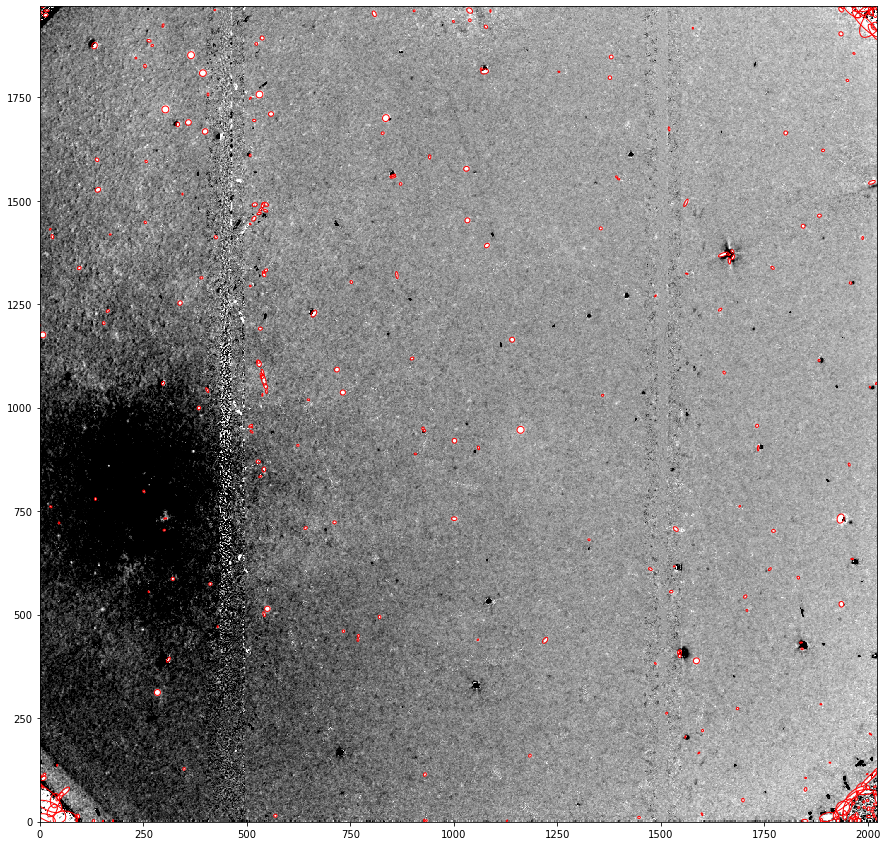

In [18]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects_crop1)):
    e = Ellipse(xy=(objects_crop1['x'][i], objects_crop1['y'][i]),
                width=6*objects_crop1['a'][i],
                height=6*objects_crop1['b'][i],
                angle=objects_crop1['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

# plot an ellipse for each object
for i in range(len(objects_crop2)):
    e = Ellipse(xy=(objects_crop2['x'][i]+507, objects_crop2['y'][i]),
                width=6*objects_crop2['a'][i],
                height=6*objects_crop2['b'][i],
                angle=objects_crop2['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [19]:
from astropy.wcs import WCS
mywcs = WCS(hdu[0].header)
newf = fits.PrimaryHDU()
newf.data = hdu[0].data[68:-50,559:990]
newf.header = hdu[0].header
newf.header.update(mywcs[68:-50,559:990].to_header())
mywcs_new1 = WCS(hdu[0].header)

rai, deci = [], []
x, y = objects_crop1['x'], objects_crop1['y']
for xi, yi in zip(x, y):
    ra, dec = mywcs_new1.all_pix2world([[xi, yi]], 0)[0]
    rai.append(ra)
    deci.append(dec)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [20]:
newf.data = hdu[0].data[68:-50,1066:-549]
newf.header = hdu[0].header
newf.header.update(mywcs[68:-50,1066:-549].to_header())
mywcs_new2 = WCS(hdu[0].header)

x2, y2 = objects_crop2['x'], objects_crop2['y']
for xii, yii in zip(x2, y2):
    ra, dec = mywcs_new2.all_pix2world([[xii, yii]], 0)[0]
    rai.append(ra)
    deci.append(dec)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [21]:
ID = []
for j in range(len(rai)):
    ID.append("S"+str(j))   

In [22]:
tr, flux, flag = np.hstack((objects_crop1['thresh'], objects_crop2['thresh'])), np.hstack((objects_crop1['flux'], objects_crop2['flux'])), np.hstack((objects_crop1['flag'], objects_crop2['flag']))

In [23]:
xt, yt = np.hstack((objects_crop1['x'], objects_crop2['x'])), np.hstack((objects_crop1['y'], objects_crop2['y']))

In [24]:
arr = np.empty((len(rai), 7), dtype=np.float64)
arr.shape

(281, 7)

In [25]:
arr[:,0] = rai
arr[:,1] = deci
arr[:,2] = xt
arr[:,3] = yt
arr[:,4] = tr
arr[:,5] = flux
arr[:,6] = flag

In [26]:
from astropy.table import Table

t = Table(arr, names=('RA', 'DEC',  'x', 'y', 'thresh', 'flux', 'flag'), meta={'name': 'first table'})
t["ID"] = ID
Col = ["ID", 'RA', 'DEC', 'x', 'y', 'thresh', 'flux', 'flag']
t_new = t[Col]

In [27]:
t_new.write("Halpha-candidates-sep.dat", format="ascii")

$\textbf{Creating DS9 regions}$

In [28]:
from catalog_utils import region_lines_from_table
regionfile = 'Halpha-candidates-sep.reg'
with open(regionfile, 'w') as f:
    f.write('\n'.join(region_lines_from_table(t, name='ID', ra='RA', dec='DEC', color='red')))

# Converting pixels in celestial coorditates

In [29]:
from astropy.wcs import WCS
mywcs = WCS(hdu[0].header)
newf = fits.PrimaryHDU()
newf.data = hdu[0].data[68:-50,559:-549]
newf.header = hdu[0].header
newf.header.update(mywcs[68:-50,559:-549].to_header())
mywcs_new = WCS(hdu[0].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [30]:
rai, deci = [], []
x, y = objects['x'], objects['y']
for xi, yi in zip(x, y):
    ra, dec = mywcs_new.all_pix2world([[xi, yi]], 0)[0]
    rai.append(ra)
    deci.append(dec)

In [31]:
ID = []
for j in range(len(objects)):
    ID.append("S"+str(j))   

In [32]:
tr, flux, flag = objects['thresh'], objects['flux'], objects['flag']

In [33]:
arr = np.empty((len(objects), 7), dtype=np.float64)
arr.shape

(382, 7)

In [34]:
arr[:,0] = rai
arr[:,1] = deci
arr[:,2] = x
arr[:,3] = y
arr[:,4] = tr
arr[:,5] = flux
arr[:,6] = flag


In [35]:
from astropy.table import Table

t = Table(arr, names=('RA', 'DEC', 'x', 'y', 'thresh', 'flux', 'flag'), meta={'name': 'first table'})
t["ID"] = ID
Col = ["ID", 'RA', 'DEC', 'x', 'y', 'thresh', 'flux', 'flag']
t_new = t[Col]

In [36]:
#t_new.write("Halpha-candidates-sep.dat", format="ascii")

# Creating regions

In [37]:
#from catalog_utils import region_lines_from_table

In [38]:
#regionfile = 'Halpha-candidates-sep.reg'
#with open(regionfile, 'w') as f:
    #f.write('\n'.join(region_lines_from_table(t, name='ID', ra='RA', dec='DEC', color='red')))